## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

#### 1. Read in the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("chronic_kidney_disease_full.csv")

In [9]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [8]:
df[df["class"] != 'ckd'] # 150 non CKD, 250 CKD; seems pretty balanced

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
250,40.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,48.0,10400.0,4.5,no,no,no,good,no,no,notckd
251,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,70.0,...,52.0,9800.0,5.0,no,no,no,good,no,no,notckd
252,45.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,82.0,...,46.0,9100.0,4.7,no,no,no,good,no,no,notckd
253,57.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,119.0,...,42.0,6200.0,6.2,no,no,no,good,no,no,notckd
254,51.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,...,49.0,8300.0,5.2,no,no,no,good,no,no,notckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


#### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer:

---

## Step 3: Explore the data.

#### 3. How much of the data is missing from each column?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [5]:
df.dropna()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


#### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

Answer: Only 158 rows would remain out of the 400. This means we miss out on a lot of data. Additionally, we might end up with biased data

#### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer:

---

## Step 4: Model the data.

#### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

Answer: A model that always returns 1

#### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: Sensitivity, minimizing false negatives

#### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: A lot of people will be panicked that they have a kidney disorder, and spend money on treating it.

#### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: A model that always returns 0

#### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: Specificity; we minimized false positives

#### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: A lot of people will suffer and not treat CKD when they have it.

#### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

Remember to do a train/test split. We suggest using GridSearchCV and pipelines.

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.feature_selection import RFE
from sklearn.metrics import RocCurveDisplay

In [24]:
X = df.drop(columns=["class"])
y = df["class"]

In [25]:
cat = ["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]

In [51]:
def debug(a):
    r = pd.DataFrame(a, columns=X.columns)
    #print(r)
    return r

In [52]:
# We need Imputer, OneHotEncoder, RFE, Regression
regr = LogisticRegression()
pip = Pipeline(steps=[("impute", SimpleImputer(strategy="most_frequent")),
                      ("intermediate", FunctionTransformer(debug)),
                     ("transform", ColumnTransformer(transformers=[("cat", OneHotEncoder(drop="first"), cat)], remainder=StandardScaler())),
                     ("rfe", RFE(regr)),
                      ("regressor", regr)])

In [53]:
parameters = {"rfe__n_features_to_select": np.arange(1, 25, 1), "regressor__C": [0.001, 0.1, 1, 10, 100, 1000]}
grd = GridSearchCV(pip, param_grid = parameters)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [101]:
results = grd.fit(X_train, Y_train)

In [102]:
grd.best_score_

0.9933333333333334

In [103]:
grd.best_params_

{'regressor__C': 10, 'rfe__n_features_to_select': 20}

In [104]:
grd.score(X_test, Y_test)

0.98

In [105]:
probabilities = grd.best_estimator_.predict_proba(X_test)

In [106]:
test_predictions = pd.Series(grd.predict(X_test))

In [107]:
len(test_predictions[test_predictions == "ckd"])/len(test_predictions)

0.62

In [108]:
from sklearn.metrics import confusion_matrix, roc_curve


In [109]:
conf=  confusion_matrix(Y_test, test_predictions)
conf

array([[62,  2],
       [ 0, 36]])

---

## Step 5: Evaluate the model.

#### 13. How well does your model perform in terms of accuracy?

`

Answer: In terms of accuracy, it has a 98% accuracy

#### 14. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

It makes sense to generate it on our test data, because we should evaluate our data on the test set we do not know.

#### 15. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: It's better to have a false positive than a false negative. We want to optimize for Sensitivity.

#### 16. How does your model perform for your chosen metric?

Answer:

In [74]:
#We have no false negatives in our model.

#### 17. Plot the ROC Curve.

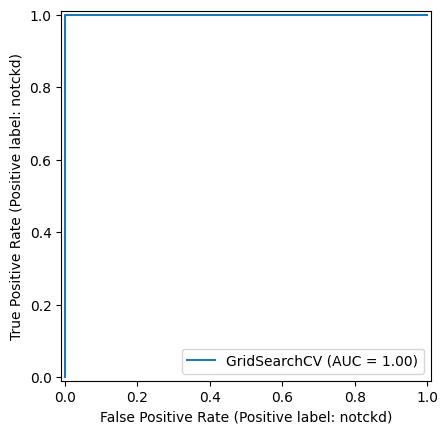

In [76]:
RocCurveDisplay.from_estimator(grd, X_test, Y_test)

In [89]:
fpr, tpr, _ = roc_curve(Y_test, probabilities[:, 0], pos_label="ckd")

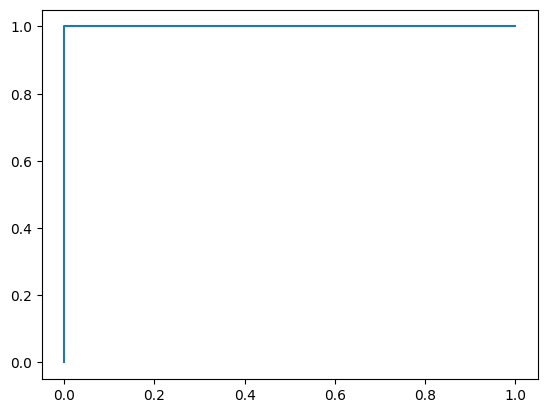

In [90]:
plt.plot(fpr, tpr)

#### 18. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

In [119]:
# We are able to see the coefficients that most affect it, learning more about the nature of the data (unlike K-means). It is also extremely lightweight.

In [120]:
results.best_estimator_["regressor"].coef_

array([[ 1.13971742,  0.49319437, -3.2654271 , -2.06414583, -2.26773538,
        -1.1599021 , -0.64291928, -0.85007858,  3.25435475, -1.69731182,
        -1.58230837, -0.96322123, -1.01816081, -1.99944826,  2.13372849,
         1.72945207,  3.1374747 ,  1.4985448 , -0.52766355,  0.50376079]])